### 1. Installing dependencies

In [1]:
!pip install gymnasium gym-anytrading pandas matplotlib stable-baselines3[extra] finta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 23.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cuspa

### 2. importing packages

In [2]:
import gymnasium as gym
import gym_anytrading
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions

from stable_baselines3 import DQN
from stable_baselines3 import A2C
from stable_baselines3 import PPO



from gym_anytrading.envs import StocksEnv
from finta import TA






### Constant

In [3]:
WINDOW_SIZE = 14
DATASET_PATH = '/content/TSLA.csv'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 3. Read the dataset and preprocess it

In [4]:
df = pd.read_csv(DATASET_PATH)

In [5]:
df['Date'] = pd.to_datetime(df.Date)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [7]:
df.set_index('Date', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
df.sort_index(inplace=True)

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2956 non-null   float64
 1   High       2956 non-null   float64
 2   Low        2956 non-null   float64
 3   Close      2956 non-null   float64
 4   Adj Close  2956 non-null   float64
 5   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 161.7 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
train_df = df.loc[df.index < '2019-01-01']
test_df = df.loc[df.index >= '2019-01-01']

print('train_df: ',len(train_df))
print('test_df: ',len(test_df))

train_df:  2142
test_df:  814


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
train_df.shape

(2142, 6)

In [13]:
env = gym.make('stocks-v0', df=train_df, frame_bound=(WINDOW_SIZE, len(train_df)), window_size=WINDOW_SIZE)

In [14]:
env.signal_features[:1,:]

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.signal_features to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.signal_features` for environment variables or `env.get_wrapper_attr('signal_features')` that will search the reminding wrappers.
  logger.warn(


array([[4.778, 0.   ]], dtype=float32)

In [15]:
env.action_space

Discrete(2)

Discrete: describes a discrete space where {0, 1, …, n-1} are the possible values our observation or action can take. Values can be shifted to {a, a+1, …, a+n-1} using an optional argument.

In [16]:
env.action_space.sample()

1

Sell = 0

Buy = 1

In [17]:
env.observation_space

Box(-10000000000.0, 10000000000.0, (14, 2), float32)

Box: describes an n-dimensional continuous space. It’s a bounded space where we can define the upper and lower limits which describe the valid values our observations can take.



In [18]:
env.observation_space.sample()

array([[ 1.3165837e+09,  5.3671101e+09],
       [-1.1404928e+09, -1.3415283e+09],
       [-7.6230252e+09, -8.3158743e+09],
       [-7.2332723e+09,  6.5491420e+09],
       [ 7.8268902e+09,  5.6900741e+09],
       [-8.6384906e+09, -1.4924668e+09],
       [-6.9032156e+09, -3.1445686e+09],
       [-4.0430454e+09,  6.0966246e+09],
       [ 1.3434516e+09, -9.9278797e+09],
       [-4.3325373e+09,  3.7237750e+09],
       [-9.6863785e+09, -9.1521710e+09],
       [-1.8536215e+09,  2.8638925e+08],
       [-8.1806126e+09, -4.5402721e+09],
       [-1.6522039e+09,  3.7284278e+09]], dtype=float32)

### 4. Create the environment and do some random action on it

info: {'total_reward': 387.4859390258789, 'total_profit': 0.3180733811624137, 'position': <Positions.Long: 1>}


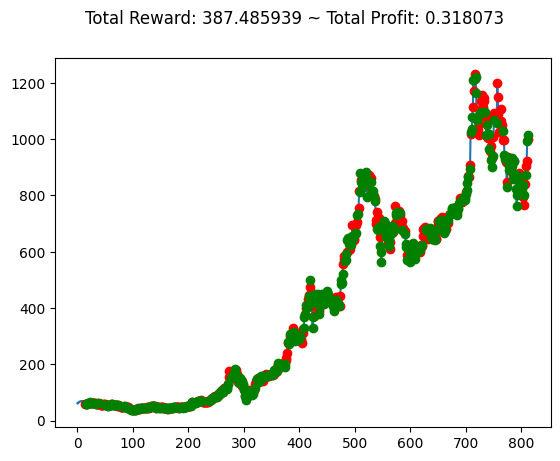

In [37]:

observation = env.reset(seed=2024)
while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.unwrapped.render_all()
plt.show()

### 5 creating and training the model

In [20]:
model = A2C("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=1000000)

Streaming output truncated to the last 5000 lines.
|    value_loss         | 1.08e-07  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 2.13e+03  |
|    ep_rew_mean        | 0         |
| time/                 |           |
|    fps                | 526       |
|    iterations         | 170700    |
|    time_elapsed       | 1621      |
|    total_timesteps    | 853500    |
| train/                |           |
|    entropy_loss       | -3.56e-07 |
|    explained_variance | -0.0793   |
|    learning_rate      | 0.0007    |
|    n_updates          | 170699    |
|    policy_loss        | -0        |
|    value_loss         | 1.45e-07  |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 2.13e+03  |
|    ep_rew_mean        | 0         |
| time/                 |           |
|    fps                | 526       |

### Save model

In [21]:
# model.save('ppo_1000000_15_senti')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# del model

### Load model

In [23]:
# model = A2C.load('/content/ppo_1000000_15_senti.zip')

### 6. Evaluate the model

info: {'total_reward': 0.0, 'total_profit': 1.0, 'position': <Positions.Short: 0>}


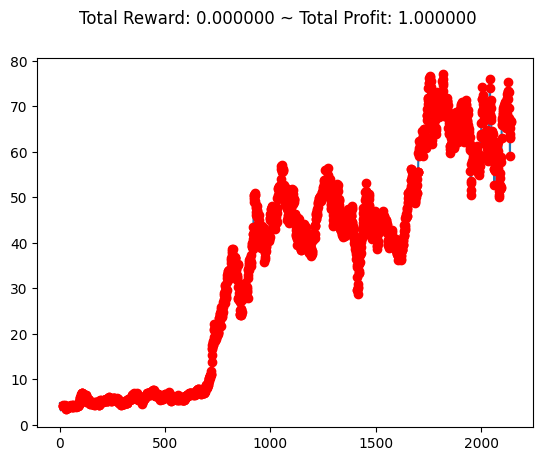

In [46]:
env = gym.make('stocks-v0', df=train_df, frame_bound=(WINDOW_SIZE, len(train_df)), window_size=WINDOW_SIZE)


observation, info = env.reset(seed=2024)
while True:
    action = model.predict(observation)
    observation, reward, terminated, truncated, info = env.step(action[0])
    done = terminated or truncated

    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.unwrapped.render_all()
plt.show()


In [54]:
AWR = env.history['total_profit']

average_sharpe_ratio = np.mean(AWR) - 1 / np.std(AWR)
print('Sharpe Ratio:', average_sharpe_ratio)

Average Reward: 0.0
Sharpe Ratio: -inf


<ipython-input-54-e1ed0d622b8e>:5: RuntimeWarning: divide by zero encountered in scalar divide
  average_sharpe_ratio = np.mean(AWR) - 1 / np.std(AWR)
